In [2]:
%matplotlib inline

In [17]:
import numpy as np
import pylab
import pandas as pd

In [83]:
alpha = np.array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]).reshape(d, 1)

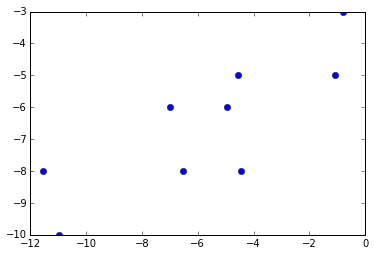

In [84]:
df = pd.read_csv('dataset.tsv', header=0, sep='\t')
n = len(df.index)
d = 8
base_X = 0

X=np.ones(shape=(n, d))
X[:, 0]=np.array(df['x1'])
X[:, 1]=np.array(df['x2'])
X[:, 2]=np.array(df['x3'])
X[:, 3]=np.array(df['x4'])
X[:, 4]=np.array(df['x5'])
X[:, 5]=np.array(df['x6'])
X[:, 6]=np.array(df['x7'])

Y = np.array(df['y']).reshape(n, 1)

pylab.plot(X[:, base_X], Y, 'o')
pylab.show()

[[-0.37753211]
 [ 1.12254046]
 [ 0.04538008]
 [-0.00242072]
 [-0.24347208]
 [ 0.08401231]
 [-0.01516604]
 [-0.08427179]]


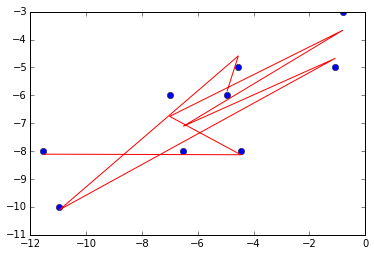

In [86]:
theta = np.zeros(shape=(d, 1))

def get_gradient(theta, X, Y):
    gradient = np.zeros(len(theta)).reshape(len(theta),1)
    h = X.dot(theta)
    delta = h - Y
    sumdelta = delta.T.dot(X).T
    for i in xrange(gradient.size):
        gradient[i] = (1.0 / n) * sumdelta[i] * - 1
    gradient *= alpha
    return sumdelta, gradient

sumdelta = np.ones(len(theta)).reshape(len(theta),1)
last_theta = np.ones(shape=(d, 1))
while np.max(np.abs(theta - last_theta)) > 0.000001:
    sumdelta, gradient = get_gradient(theta, X, Y)
    last_theta = theta
    theta = theta + gradient
print theta
P=X.dot(theta)
pylab.plot(X[:, base_X], Y, 'o')
pylab.plot(X[:, base_X], P, 'k-',  color='red')
pylab.show()